<a href="https://colab.research.google.com/github/mleyvaz/NeutrosophicStats/blob/main/Neutrosophics_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Librerias 
import numpy as np
import pandas as pd
import cv2  
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image,ImageFilter 
import matplotlib.pylab as plt

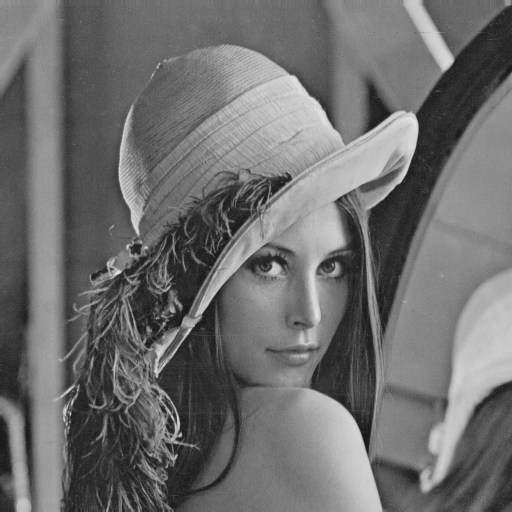

In [12]:

image =  io.imread('https://github.com/mleyvaz/NeutrosophicStats/blob/main/Lenna_(test_image).png?raw=true')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

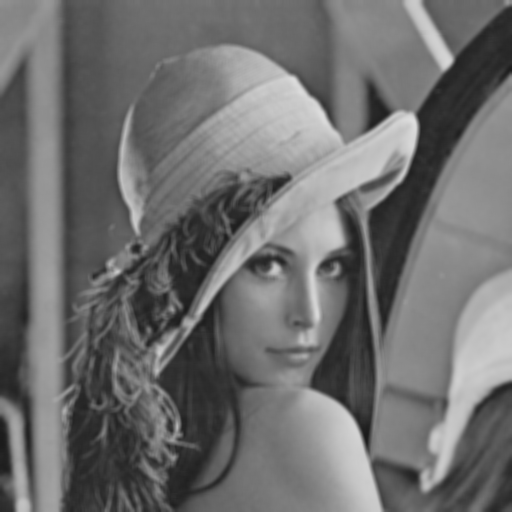

In [13]:
#Verticales
kernel =1/25* np.array([[1,1, 1,1,1],
                   [1,1, 1,1,1],
                   [1, 1, 1,1,1],
                   [1,1, 1,1,1],
                   [1, 1, 1,1,1]])
img = cv2.filter2D(gray, -1, kernel)
cv2_imshow(img)

In [19]:
#Neut
a,b=gray.shape
ind=np.random.rand(a, b)
for i in range(a):
  for j in range(b):
    ind[i,j]=abs(gray[i,j]-img[i,j])


# sub=ind[i-2:i+3,j-2:j+3]

  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


Indeterminate Image


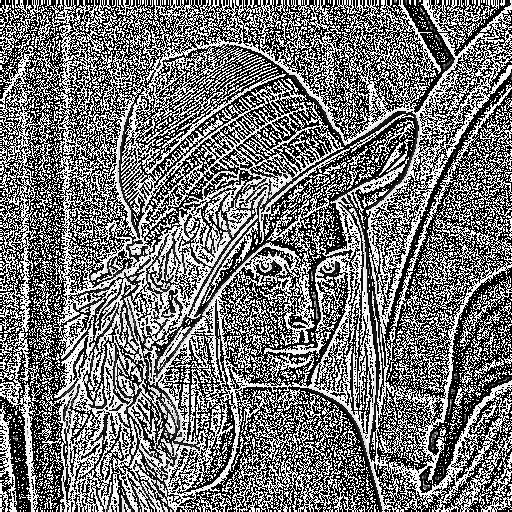

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [20]:
imgN = Image.new("RGB", (a, b))
imgN=Image.fromarray(ind)
minI=imgN.filter(ImageFilter.MinFilter(size = 5)) 
maxI=imgN.filter(ImageFilter.MaxFilter(size = 5)) 
neuMin = np.array(minI)
neutMax=np.array(maxI)
neu=(ind-neuMin)/(neutMax-neuMin)
print("Indeterminate Image")

cv2_imshow(neu*255)

img2=Image.fromarray(img)
minN=img2.filter(ImageFilter.MinFilter(size = 5)) 
maxN=img2.filter(ImageFilter.MaxFilter(size = 5)) 
Min = np.array(minN)
Max=np.array(maxN)

tru=(img-Min)/(Max-Min)
fal=(Max-img)/(Max-Min)


True image


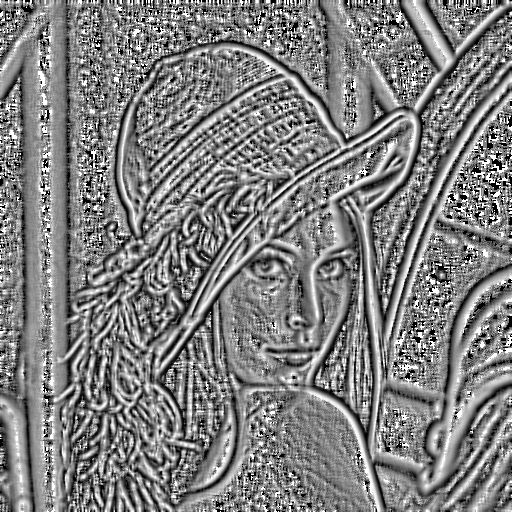

In [21]:
print("True image")
cv2_imshow(tru*255)

False Image


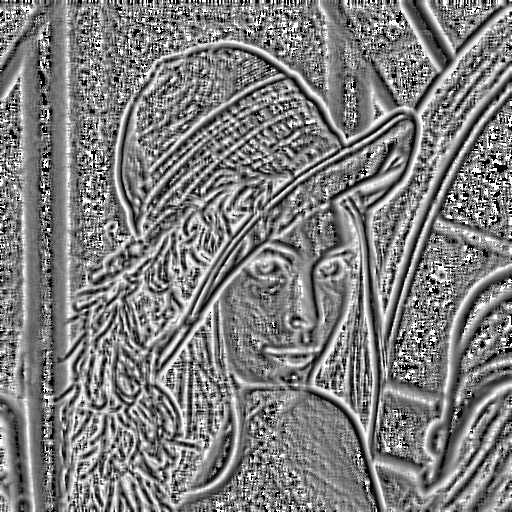

In [23]:
print("False Image")
cv2_imshow(fal*255)